# cleanup rtsys source data

In [1]:
import glob

# cognac data and tools
import cognac.insitu as insi

---
## load data

In [2]:
# select campaign

#campaign = 'microco_leg2.yaml'
#campaign = 'lopstech19_leg1.yaml'
#campaign = 'lopstech19_leg2.yaml'
campaign = 'cognac20.yaml'

cp = insi.utils.campaign(campaign)

In [ ]:
# load source data
label = 'emetteur'
sdata = insi.source.load_source_files(cp[label]['path'], label=label)

Reads /Users/aponte/Current_projects/cognac/campagnes/2020_cognac20/data/source/data/201123/mission_2020-11-23_10-51-23.txt
Reads /Users/aponte/Current_projects/cognac/campagnes/2020_cognac20/data/source/data/201123/mission_2020-11-23_10-55-56.txt
Reads /Users/aponte/Current_projects/cognac/campagnes/2020_cognac20/data/source/data/201123/mission_2020-11-23_11-29-39.txt
Reads /Users/aponte/Current_projects/cognac/campagnes/2020_cognac20/data/source/data/201123/mission_2020-11-23_11-34-43.txt
Reads /Users/aponte/Current_projects/cognac/campagnes/2020_cognac20/data/source/data/201123/mission_2020-11-23_12-08-39.txt
Reads /Users/aponte/Current_projects/cognac/campagnes/2020_cognac20/data/source/data/201123/mission_2020-11-23_12-45-44.txt
Reads /Users/aponte/Current_projects/cognac/campagnes/2020_cognac20/data/source/data/201123/mission_2020-11-23_12-47-21.txt
Reads /Users/aponte/Current_projects/cognac/campagnes/2020_cognac20/data/source/data/201123/mission_2020-11-23_12-56-25.txt
Reads /U

In [4]:
# inspect gps data
sdata.gps.d.head()

,lon,lat,velocity
time,,,
2019-10-27 16:38:02,5.580399,42.903072,NaN
2019-10-27 16:38:03,5.580398,42.903086,1.522406
2019-10-27 16:38:04,5.580399,42.903109,2.542867
2019-10-27 16:38:05,5.580400,42.903127,2.078413
2019-10-27 16:38:06,5.580400,42.903131,0.424697


In [5]:
#sdata.gps.d.fillna(0., inplace=True)

In [8]:
sdata.gps.plot_bk(unit=cp['source'], rule='1T')

Loading BokehJS ...

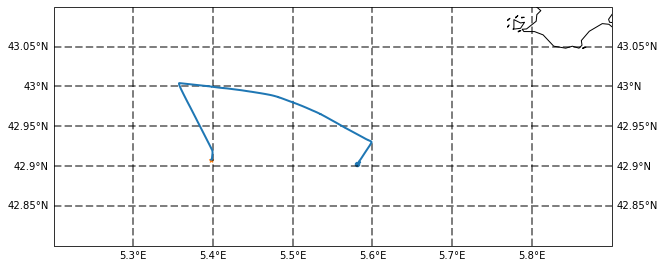

In [9]:
fac = insi.utils.plot_map(cp=cp)
sdata.gps.plot(fac=fac)

---
## clean up data and divide by deployments

In [10]:
cp = insi.utils.campaign(campaign)

In [11]:
# clean gps data with deployment log
source={}
for s in cp['source']:
    print(s)
    source[s.label] = sdata.clean_deployment(s, inplace=False)

--
Deployment label: d0_synchro
Start:
-
Event label: start
Time: 
2019-10-27 17:00:00
Lon:5.581816666666667 = 5.0deg 34.909
Lat:42.90388333333333 = 42.0deg 54.232999999999976

End:
-
Event label: end
Time: 
2019-10-27 17:12:00
Lon:5.581816666666667 = 5.0deg 34.909
Lat:42.90388333333333 = 42.0deg 54.232999999999976


--
Deployment label: d0
Start:
-
Event label: start
Time: 
2019-10-27 17:27:00
Lon:5.5989 = 5.0deg 35.934000000000026
Lat:42.929766666666666 = 42.0deg 55.785999999999945

End:
-
Event label: end
Time: 
2019-10-28 06:10:00
Lon:5.360116666666666 = 5.0deg 21.606999999999985
Lat:43.00386833333334 = 43.0deg 0.2321000000002016


--
Deployment label: d0_end_synchro
Start:
-
Event label: start
Time: 
2019-10-28 07:00:00
Lon:5.39895 = 5.0deg 23.93700000000001
Lat:42.90893333333333 = 42.0deg 54.5359999999998

End:
-
Event label: end
Time: 
2019-10-28 07:20:00
Lon:5.39895 = 5.0deg 23.93700000000001
Lat:42.90893333333333 = 42.0deg 54.5359999999998




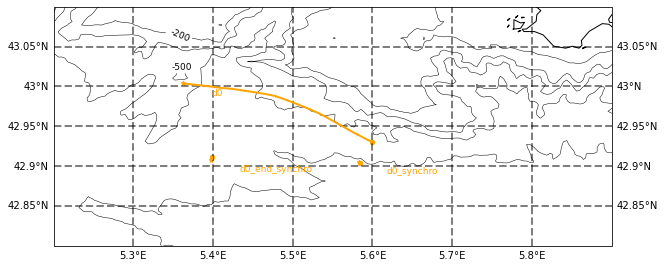

In [12]:
# plot overview map
fac = insi.utils.plot_map(cp=cp)
insi.utils.plot_bathy(fac)
for label, s in source.items():
    if s.gps:
        print(s.gps)
        s.gps.plot(fac=fac, label=label, color=cp['source']['color'])

---
## store

In [13]:
for label, lsource in source.items():
    lsource.to_pickle(cp.pathp+'source_log_'+label+'.p')

Data store to /Users/aponte/Current_projects/cognac/campagnes/2019_lopstech/leg2/data/datap/source_log_d0_synchro.p
Data store to /Users/aponte/Current_projects/cognac/campagnes/2019_lopstech/leg2/data/datap/source_log_d0.p
Data store to /Users/aponte/Current_projects/cognac/campagnes/2019_lopstech/leg2/data/datap/source_log_d0_end_synchro.p
